In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
image = io.imread('bird_small.png')

In [3]:
rows = image.shape[0]
cols = image.shape[1]

In [4]:
image = image.reshape(rows*cols, 3)

In [21]:
image

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

In [5]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(image)

KMeans(n_clusters=16)

In [7]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
compressed_image = compressed_image.reshape(rows, cols, 3)

In [28]:
compressed_image.shape

(128, 128, 3)

In [19]:
io.imsave('compressed_image_16.png', compressed_image)

In [14]:
img2=io.imread('compressed_image_16.png')

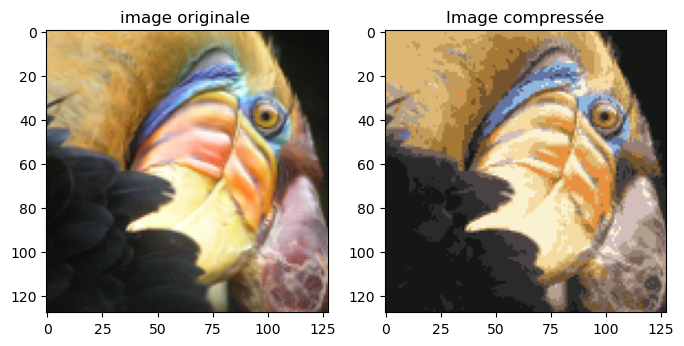

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Afficher l'image oriigaine
axs[0].imshow(image)
axs[0].set_title("image originale ")
# Afficher l'image compressée
axs[1].imshow(img2)
axs[1].set_title("Image compressée")
# Afficher la figure
plt.show()